# 톤 수별 가격 예측 모델

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'

In [ ]:
# 필요한 라이브러리 설치 및 임포트

import pandas as pd
import datetime

# 데이터 불러오기

In [ ]:
# 드라이브 사용 설정
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/kt_aivle/bigproject/data/화물차운송료.csv")
df

,출발지,출벌지 주소,출발지 위도경도,도착지,도착지 주소,도착지 위도경도,km,1톤,1.4톤,2.5톤,5톤,8톤,11톤,25톤
0,대전,대전 서구 둔산로 100,"('127.3849508', '36.3504396')",서울,서울 중구 세종대로 110 서울특별시청,"('126.9783882', '37.5666103')",164,135000,160000,200000,250000,300000,315000,420000
1,대전,NaN,"('127.3849508', '36.3504396')",수원,경기 수원시 팔달구 효원로 241 수원시청,"('127.0286460', '37.2634760')",132,120000,145000,180000,230000,270000,285000,385000
2,대전,NaN,"('127.3849508', '36.3504396')",팔달구,경기 수원시 팔달구 창룡대로 23,"('127.0200976', '37.2825695')",137,120000,140000,175000,215000,270000,280000,380000
3,대전,NaN,"('127.3849508', '36.3504396')",기흥구,경기 용인시 기흥구 관곡로 95 기흥구청,"('127.1146620', '37.2804500')",128,110000,135000,170000,205000,255000,270000,365000
4,대전,NaN,"('127.3849508', '36.3504396')",남양주,경기 남양주시 경춘로 1037 남양주시청제1청사,"('127.2164670', '37.6359850')",131,140000,165000,200000,255000,300000,315000,425000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,울산,NaN,"('129.3112994', '35.5394773')",당진,충남 당진시 시청1로 1 당진시청,"('126.6459003', '36.8899744')",360,240000,285000,335000,405000,465000,490000,655000
462,울산,NaN,"('129.3112994', '35.5394773')",부산,부산 연제구 중앙대로 1001 부산광역시청,"('129.0750223', '35.1798160')",51,90000,110000,135000,170000,205000,230000,310000
463,울산,NaN,"('129.3112994', '35.5394773')",기장,부산 기장군 기장읍 기장대로 560 기장군청,"('129.2223120', '35.2444980')",37,80000,100000,130000,155000,190000,205000,290000
464,울산,NaN,"('129.3112994', '35.5394773')",양산,경남 양산시 중앙로 39 양산시청,"('129.0373390', '35.3350490')",44,85000,100000,130000,160000,195000,210000,295000


In [ ]:
df = df[['출발지 위도경도','도착지 위도경도','km','1톤','1.4톤','2.5톤','5톤','8톤','11톤','25톤']]
df

,출발지 위도경도,도착지 위도경도,km,1톤,1.4톤,2.5톤,5톤,8톤,11톤,25톤
0,"('127.3849508', '36.3504396')","('126.9783882', '37.5666103')",164,135000,160000,200000,250000,300000,315000,420000
1,"('127.3849508', '36.3504396')","('127.0286460', '37.2634760')",132,120000,145000,180000,230000,270000,285000,385000
2,"('127.3849508', '36.3504396')","('127.0200976', '37.2825695')",137,120000,140000,175000,215000,270000,280000,380000
3,"('127.3849508', '36.3504396')","('127.1146620', '37.2804500')",128,110000,135000,170000,205000,255000,270000,365000
4,"('127.3849508', '36.3504396')","('127.2164670', '37.6359850')",131,140000,165000,200000,255000,300000,315000,425000
...,...,...,...,...,...,...,...,...,...,...
461,"('129.3112994', '35.5394773')","('126.6459003', '36.8899744')",360,240000,285000,335000,405000,465000,490000,655000
462,"('129.3112994', '35.5394773')","('129.0750223', '35.1798160')",51,90000,110000,135000,170000,205000,230000,310000
463,"('129.3112994', '35.5394773')","('129.2223120', '35.2444980')",37,80000,100000,130000,155000,190000,205000,290000
464,"('129.3112994', '35.5394773')","('129.0373390', '35.3350490')",44,85000,100000,130000,160000,195000,210000,295000


In [ ]:
df.isnull().sum()

출발지 위도경도    0
도착지 위도경도    0
km          0
1톤          0
1.4톤        0
2.5톤        0
5톤          0
8톤          0
11톤         0
25톤         0
dtype: int64

In [ ]:
# 열을 ','를 기준으로 나누어 두 개의 열로 만들기
df[['start_lat', 'start_long']] = df['출발지 위도경도'].str.split("', '", expand=True)

<ipython-input-8-bbaecd2f76ba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['start_lat', 'start_long']] = df['출발지 위도경도'].str.split("', '", expand=True)
<ipython-input-8-bbaecd2f76ba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['start_lat', 'start_long']] = df['출발지 위도경도'].str.split("', '", expand=True)


In [ ]:
df[['goal_lat', 'goal_long']] = df['도착지 위도경도'].str.split("', '", expand=True)

<ipython-input-9-9b37a7d53164>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['goal_lat', 'goal_long']] = df['도착지 위도경도'].str.split("', '", expand=True)


In [ ]:
df.drop(['도착지 위도경도','출발지 위도경도'],axis=1,inplace=True)
df

,km,1톤,1.4톤,2.5톤,5톤,8톤,11톤,25톤,start_lat,start_long,goal_lat,goal_long
0,164,135000,160000,200000,250000,300000,315000,420000,('127.3849508,36.3504396'),('126.9783882,37.5666103')
1,132,120000,145000,180000,230000,270000,285000,385000,('127.3849508,36.3504396'),('127.0286460,37.2634760')
2,137,120000,140000,175000,215000,270000,280000,380000,('127.3849508,36.3504396'),('127.0200976,37.2825695')
3,128,110000,135000,170000,205000,255000,270000,365000,('127.3849508,36.3504396'),('127.1146620,37.2804500')
4,131,140000,165000,200000,255000,300000,315000,425000,('127.3849508,36.3504396'),('127.2164670,37.6359850')
...,...,...,...,...,...,...,...,...,...,...,...,...
461,360,240000,285000,335000,405000,465000,490000,655000,('129.3112994,35.5394773'),('126.6459003,36.8899744')
462,51,90000,110000,135000,170000,205000,230000,310000,('129.3112994,35.5394773'),('129.0750223,35.1798160')
463,37,80000,100000,130000,155000,190000,205000,290000,('129.3112994,35.5394773'),('129.2223120,35.2444980')
464,44,85000,100000,130000,160000,195000,210000,295000,('129.3112994,35.5394773'),('129.0373390,35.3350490')


In [ ]:
# 열의 값에서 '(' 제거
df['start_lat'] = df['start_lat'].str[2:].astype(float)
df['goal_lat'] = df['goal_lat'].str[2:].astype(float)
df['start_long'] = df['start_long'].str[:-2].astype(float)
df['goal_long'] = df['goal_long'].str[:-2].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   km          466 non-null    int64  
 1   1톤          466 non-null    int64  
 2   1.4톤        466 non-null    int64  
 3   2.5톤        466 non-null    int64  
 4   5톤          466 non-null    int64  
 5   8톤          466 non-null    int64  
 6   11톤         466 non-null    int64  
 7   25톤         466 non-null    int64  
 8   start_lat   466 non-null    float64
 9   start_long  466 non-null    float64
 10  goal_lat    466 non-null    float64
 11  goal_long   466 non-null    float64
dtypes: float64(4), int64(8)
memory usage: 43.8 KB


In [ ]:
df.head()

,km,1톤,1.4톤,2.5톤,5톤,8톤,11톤,25톤,start_lat,start_long,goal_lat,goal_long
0,164,135000,160000,200000,250000,300000,315000,420000,127.384951,36.35044,126.978388,37.566610
1,132,120000,145000,180000,230000,270000,285000,385000,127.384951,36.35044,127.028646,37.263476
2,137,120000,140000,175000,215000,270000,280000,380000,127.384951,36.35044,127.020098,37.282570
3,128,110000,135000,170000,205000,255000,270000,365000,127.384951,36.35044,127.114662,37.280450
4,131,140000,165000,200000,255000,300000,315000,425000,127.384951,36.35044,127.216467,37.635985


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


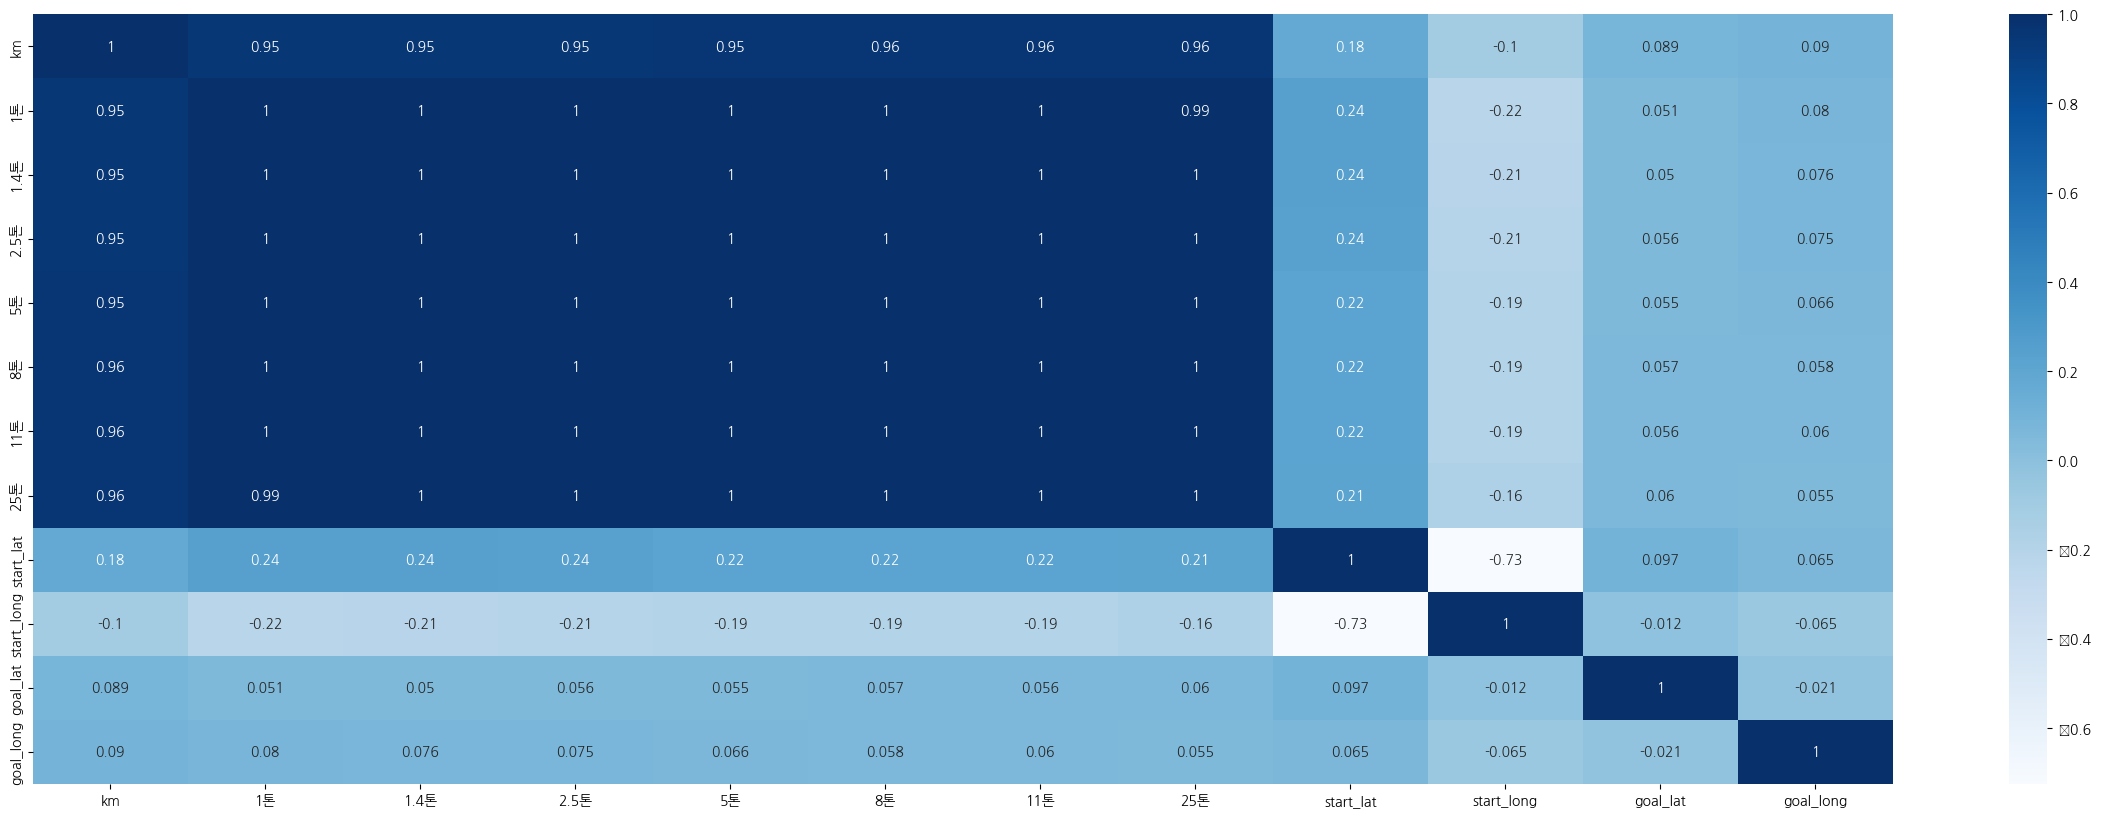

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30,10))
sns.heatmap(df.corr(),cmap='Blues',annot=True)

# 모델링

## 1톤

In [ ]:
from sklearn.model_selection import train_test_split

X = df[['km','start_lat','start_long','goal_lat','goal_long']]
y = df['1톤']

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### 스케일링

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### 랜덤포레스트

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
pred = model.predict(x_test)

In [ ]:
# 모듈 불러오기
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# 성능 평가
print('MAE:', mean_absolute_error(y_test, pred))
print('MSE:', mean_squared_error(y_test, pred)**(1/2))
print('R2:', r2_score(y_test, pred))

MAE: 7700.531914893617
MSE: 11758.296075356526
R2: 0.9437280236300719


In [ ]:
# 초기에만 실시
result = {}

result['randomforest'] = r2_score(y_test, pred)

### lgbm

In [ ]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor()
lgbm.fit(x_train,y_train)

pred = lgbm.predict(x_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000071 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 298
[LightGBM] [Info] Number of data points in the train set: 372, number of used features: 5
[LightGBM] [Info] Start training from score 153736.559140
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

In [ ]:
print('MAE:', mean_absolute_error(y_test, pred))
print('MSE:', mean_squared_error(y_test, pred)**(1/2))
print('R2:', r2_score(y_test, pred))

MAE: 6718.375108905721
MSE: 9687.60355475897
R2: 0.9618023978288155


In [ ]:
result['lgbm'] = r2_score(y_test, pred)

### xgb

In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(x_train,y_train)

pred = xgb.predict(x_test)

In [ ]:
print('MAE:', mean_absolute_error(y_test, pred))
print('MSE:', mean_squared_error(y_test, pred)**(1/2))
print('R2:', r2_score(y_test, pred))

MAE: 6779.442736037234
MSE: 10316.731216591103
R2: 0.956680082852319


In [ ]:
result['xgb'] = r2_score(y_test, pred)

### 그래프

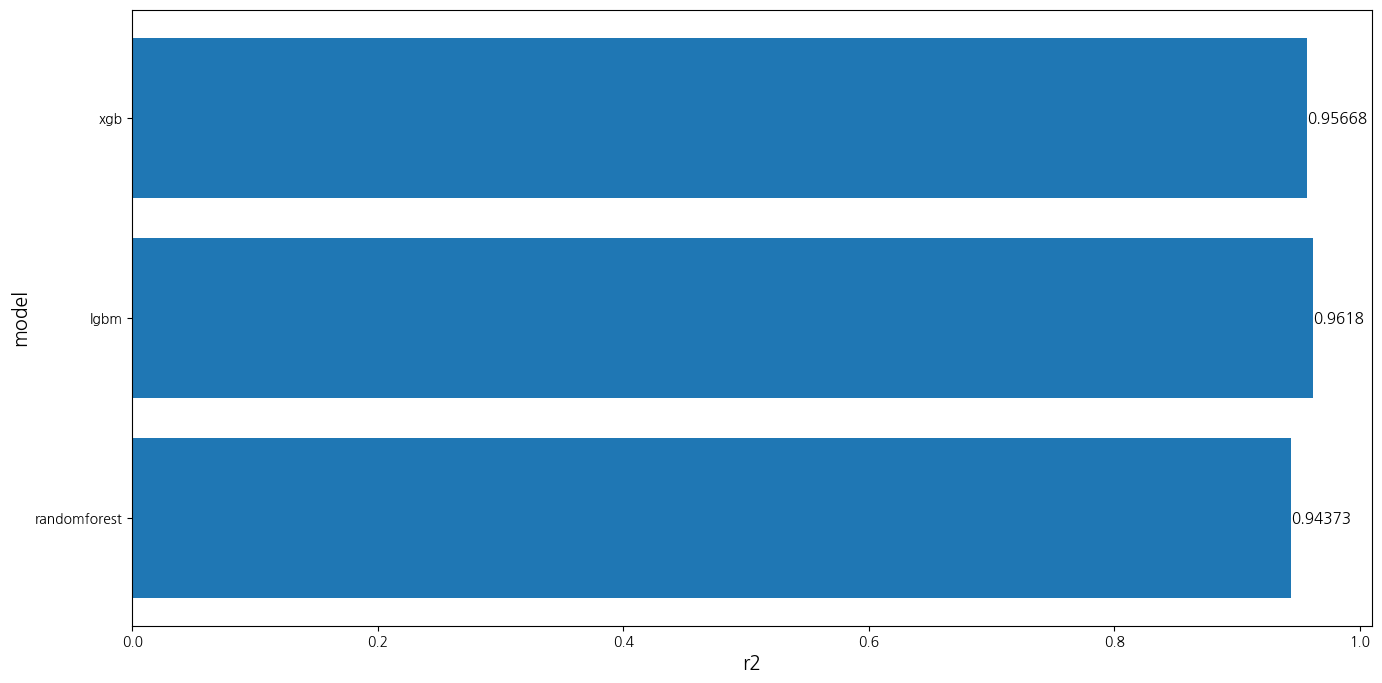

In [ ]:
# 모델 끝부분에 실시
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))

plt.barh(list(result.keys()), result.values())
# 각 막대 위에 숫자 표시
for index, value in enumerate(result.values()):
    plt.text(value, index, round(value,5), ha='left', va='center', fontsize=11)

plt.xlabel('r2',fontsize=14)
plt.ylabel('model',fontsize=14)

plt.show()

### 저장

In [ ]:
import joblib

# 또는 joblib을 사용하여 저장
joblib.dump(lgbm, '1ton.pkl')

['1ton.pkl']

## 1.4톤

In [ ]:
from sklearn.model_selection import train_test_split

X = df[['km','start_lat','start_long','goal_lat','goal_long']]
y = df['1.4톤']

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### 스케일링

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### lgbm

In [ ]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor()
lgbm.fit(x_train,y_train)

pred = lgbm.predict(x_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000062 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 298
[LightGBM] [Info] Number of data points in the train set: 372, number of used features: 5
[LightGBM] [Info] Start training from score 184502.688172
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

In [ ]:
print('MAE:', mean_absolute_error(y_test, pred))
print('MSE:', mean_squared_error(y_test, pred)**(1/2))
print('R2:', r2_score(y_test, pred))

MAE: 8162.684126426678
MSE: 11275.728976594155
R2: 0.962847907075921


### 저장

In [ ]:
import joblib

# 또는 joblib을 사용하여 저장
joblib.dump(lgbm, '1.4ton.pkl')

['1.4ton.pkl']

## 2.5톤

In [ ]:
from sklearn.model_selection import train_test_split

X = df[['km','start_lat','start_long','goal_lat','goal_long']]
y = df['2.5톤']

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### 스케일링

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### lgbm

In [ ]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor()
lgbm.fit(x_train,y_train)

pred = lgbm.predict(x_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000070 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 298
[LightGBM] [Info] Number of data points in the train set: 372, number of used features: 5
[LightGBM] [Info] Start training from score 226021.505376
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

In [ ]:
print('MAE:', mean_absolute_error(y_test, pred))
print('MSE:', mean_squared_error(y_test, pred)**(1/2))
print('R2:', r2_score(y_test, pred))

MAE: 8884.526840799377
MSE: 12566.696535676294
R2: 0.9643153681236621


### 저장

In [ ]:
import joblib

# 또는 joblib을 사용하여 저장
joblib.dump(lgbm, '2.5ton.pkl')

['2.5ton.pkl']

## 5톤

In [ ]:
from sklearn.model_selection import train_test_split

X = df[['km','start_lat','start_long','goal_lat','goal_long']]
y = df['5톤']

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### 스케일링

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### lgbm

In [ ]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor()
lgbm.fit(x_train,y_train)

pred = lgbm.predict(x_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000065 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 298
[LightGBM] [Info] Number of data points in the train set: 372, number of used features: 5
[LightGBM] [Info] Start training from score 277755.376344
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

In [ ]:
print('MAE:', mean_absolute_error(y_test, pred))
print('MSE:', mean_squared_error(y_test, pred)**(1/2))
print('R2:', r2_score(y_test, pred))

MAE: 10257.649771950842
MSE: 14602.835383980131
R2: 0.965866936128051


### 저장

In [ ]:
import joblib

# 또는 joblib을 사용하여 저장
joblib.dump(lgbm, '5ton.pkl')

['5ton.pkl']

## 8톤

In [ ]:
from sklearn.model_selection import train_test_split

X = df[['km','start_lat','start_long','goal_lat','goal_long']]
y = df['8톤']

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### 스케일링

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### lgbm

In [ ]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor()
lgbm.fit(x_train,y_train)

pred = lgbm.predict(x_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000067 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 298
[LightGBM] [Info] Number of data points in the train set: 372, number of used features: 5
[LightGBM] [Info] Start training from score 327352.150538
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

In [ ]:
print('MAE:', mean_absolute_error(y_test, pred))
print('MSE:', mean_squared_error(y_test, pred)**(1/2))
print('R2:', r2_score(y_test, pred))

MAE: 10730.684398544006
MSE: 15348.288662541803
R2: 0.9676266016100423


### 저장

In [ ]:
import joblib

# 또는 joblib을 사용하여 저장
joblib.dump(lgbm, '8ton.pkl')

['8ton.pkl']

## 11톤

In [ ]:
from sklearn.model_selection import train_test_split

X = df[['km','start_lat','start_long','goal_lat','goal_long']]
y = df['11톤']

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### 스케일링

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### lgbm

In [ ]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor()
lgbm.fit(x_train,y_train)

pred = lgbm.predict(x_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000079 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 298
[LightGBM] [Info] Number of data points in the train set: 372, number of used features: 5
[LightGBM] [Info] Start training from score 344443.548387
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

In [ ]:
print('MAE:', mean_absolute_error(y_test, pred))
print('MSE:', mean_squared_error(y_test, pred)**(1/2))
print('R2:', r2_score(y_test, pred))

MAE: 11823.003403412686
MSE: 16557.07558116494
R2: 0.9646734931295203


### 저장

In [ ]:
import joblib

# 또는 joblib을 사용하여 저장
joblib.dump(lgbm, '11ton.pkl')

['11ton.pkl']

## 25톤

In [ ]:
from sklearn.model_selection import train_test_split

X = df[['km','start_lat','start_long','goal_lat','goal_long']]
y = df['25톤']

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### 스케일링

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### lgbm

In [ ]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor()
lgbm.fit(x_train,y_train)

pred = lgbm.predict(x_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000065 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 298
[LightGBM] [Info] Number of data points in the train set: 372, number of used features: 5
[LightGBM] [Info] Start training from score 465940.860215
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

In [ ]:
print('MAE:', mean_absolute_error(y_test, pred))
print('MSE:', mean_squared_error(y_test, pred)**(1/2))
print('R2:', r2_score(y_test, pred))

MAE: 15427.17468699297
MSE: 21842.60825115296
R2: 0.9640032567693623


### 저장

In [ ]:
import joblib

# 또는 joblib을 사용하여 저장
joblib.dump(lgbm, '25ton.pkl')

['25ton.pkl']